In [1]:
from pathlib import Path

from toolbox_continu_inzicht import Config, DataAdapter
from toolbox_continu_inzicht.fragility_curves import (
    FragilityCurvesPiping,
)

In [2]:
path = Path.cwd() / "data_sets"
config = Config(config_path=path / "demo_fragility_multiple_curves_pipping_db.yaml")
config.lees_config()
data_adapter = DataAdapter(config=config)

```yaml
GlobalVariables:
    rootdir: "data_sets"
    moments: [-24,0,24,48]

DataAdapter:
    probabilistic_input:
        type: excel
        file: "invoer_multiple_piping_sections.xlsx"
    probabilistic_db:
        type: ci_postgresql_probablistic_pipping
        database: "geoserver"
        schema: "continuinzicht_demo_realtime"
    waterlevels:
        type: csv
        file: "waterlevels.csv"
    fragility_curves:
        type: ci_postgresql_fragilitycurves_table
        database: "geoserver"
        schema: "continuinzicht_demo_realtime"
    fragility_curves_csv:
        type: csv
        file: "fragility_multiple_curves_piping.csv"
```

Werkt wel mel met excel 

In [42]:
fragility_curves_overtopping = FragilityCurvesPiping(data_adapter=data_adapter)
fragility_curves_overtopping.run(
    input=["probabilistic_input", "waterlevels"],
    output="fragility_curves_csv",
)

set MaximumAbsoluteError to 0.01
set MaximumRelativeError to 0.01
set MaximumResidualError to 1e-05
set MaximumConstraintError to 0.01
set MaximumIterationNumber to 100
set MaximumAbsoluteError to 0.01
set MaximumRelativeError to 0.01
set MaximumResidualError to 1e-05
set MaximumConstraintError to 0.01
set MaximumIterationNumber to 100
set MaximumAbsoluteError to 0.01
set MaximumRelativeError to 0.01
set MaximumResidualError to 1e-05
set MaximumConstraintError to 0.01
set MaximumIterationNumber to 100
set MaximumAbsoluteError to 0.01
set MaximumRelativeError to 0.01
set MaximumResidualError to 1e-05
set MaximumConstraintError to 0.01
set MaximumIterationNumber to 100
set MaximumAbsoluteError to 0.01
set MaximumRelativeError to 0.01
set MaximumResidualError to 1e-05
set MaximumConstraintError to 0.01
set MaximumIterationNumber to 100
set MaximumAbsoluteError to 0.01
set MaximumRelativeError to 0.01
set MaximumResidualError to 1e-05
set MaximumConstraintError to 0.01
set MaximumIteration

In [ ]:
df = fragility_curves_overtopping.df_out
df = df[df["section_id"] == 1]

<Axes: xlabel='waterlevels'>

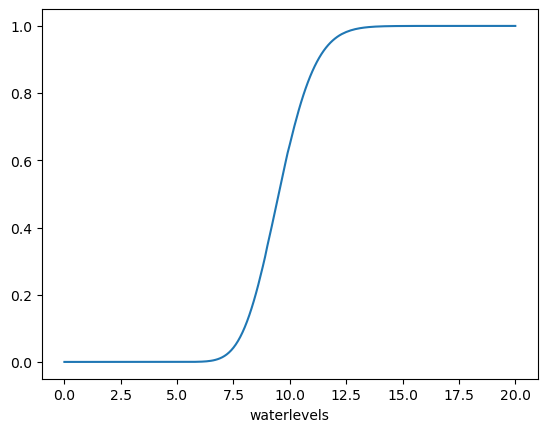

In [ ]:
df.set_index("waterlevels")["failure_probability"].plot()

Niet met db

In [5]:
import pandas as pd

In [34]:
df = data_adapter.input("probabilistic_db")
df_edit = df.copy()
for col in [
    "Afknot_links",
    "Afknot_rechts",
    "Verschuiving",
    "Mean",
    "StDev",
    "Spreiding",
]:
    df_edit[col] = pd.to_numeric(df[col], errors="coerce").astype(float)

data_adapter.set_dataframe_adapter("df_pipping_edit", df_edit, if_not_exist="create")

In [41]:
fragility_curves_overtopping.run(
    input=["df_pipping_edit", "waterlevels"],
    output="fragility_curves_csv",
)

TypeError: in method 'OptimizationAlgorithmImplementation_setMaximumAbsoluteError', argument 2 of type 'OT::Scalar'